# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 50000
numberDeaths = 35000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '160days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31       0.0000     0.0000   
1          AFG      Asia    Afghanistan 2020-01-01       0.0000     0.0000   
2          AFG      Asia    Afghanistan 2020-01-02       0.0000     0.0000   
3          AFG      Asia    Afghanistan 2020-01-03       0.0000     0.0000   
4          AFG      Asia    Afghanistan 2020-01-04       0.0000     0.0000   
...        ...       ...            ...        ...          ...        ...   
34868      NaN       NaN  International 2020-02-28     705.0000     0.0000   
34869      NaN       NaN  International 2020-02-29     705.0000     0.0000   
34870      NaN       NaN  International 2020-03-01     705.0000     0.0000   
34871      NaN       NaN  International 2020-03-02     705.0000     0.0000   
34872      NaN       NaN  International 2020-03-10     696.0000    -9.0000   

       total_deaths  new_deaths  total_cases_per_million  \
0            0.0000      0.0000                   0.0000   
1            0.0000      0.0000                   0.0000   
2            0.0000      0.0000                   0.0000   
3            0.0000      0.0000                   0.0000   
4            0.0000      0.0000                   0.0000   
...             ...         ...                      ...   
34868        4.0000      0.0000                      nan   
34869        6.0000      2.0000                      nan   
34870        6.0000      0.0000                      nan   
34871        6.0000      0.0000                      nan   
34872        7.0000      1.0000                      nan   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     0.0000  ...         1.3370       1803.9870   
1                     0.0000  ...         1.3370       1803.9870   
2                     0.0000  ...         1.3370       1803.9870   
3                     0.0000  ...         1.3370       1803.9870   
4                     0.0000  ...         1.3370       1803.9870   
...                      ...  ...            ...             ...   
34868                    nan  ...            nan             nan   
34869                    nan  ...            nan             nan   
34870                    nan  ...            nan             nan   
34871                    nan  ...            nan             nan   
34872                    nan  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan               597.0290               9.5900   
1                  nan               597.0290               9.5900   
2                  nan               597.0290               9.5900   
3                  nan               597.0290               9.5900   
4                  nan               597.0290               9.5900   
...                ...                    ...                  ...   
34868              nan                    nan                  nan   
34869              nan                    nan                  nan   
34870              nan                    nan                  nan   
34871              nan                    nan                  nan   
34872              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                 37.7460   
1                 nan           nan                 37.7460   
2                 nan           nan                 37.7460   
3                 nan           nan                 37.7460   
4                 nan           nan                 37.7460   
...               ...           ...                     ...   
34868             nan           nan                     nan   
34869             nan           nan                     nan   
34870             nan           nan                     nan   
34871             nan           nan                     nan 

In [10]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [11]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
9181  2020-02-29    Dominican Republic       0.0000        0.0000     0.0000   
14875 2020-03-01             Indonesia       0.0000        0.0000     0.0000   
14874 2020-02-29             Indonesia       0.0000        0.0000     0.0000   
21910 2020-03-17               Myanmar       0.0000        0.0000     0.0000   
15522 2020-02-29               Ireland       0.0000        0.0000     0.0000   
...          ...                   ...          ...           ...        ...   
32582 2020-03-14  United Arab Emirates          nan           nan        nan   
33936 2020-03-03               Vietnam          nan           nan        nan   
33937 2020-03-04               Vietnam          nan           nan        nan   
33938 2020-03-05               Vietnam          nan           nan        nan   
33939 2020-03-06               Vietnam          nan           nan        nan   

       new_deaths  
9181       0.0000  
14875      0.0000  
14874      0.0000  
21910      0.0000  
15522      0.0000  
...           ...  
32582         nan  
33936         nan  
33937         nan  
33938         nan  
33939         nan  

[30674 rows x 6 columns]

# Number of cases and deaths in World

In [12]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-02-29    85237.0000     2921.0000   1856.0000     64.0000
1   2020-03-01    87061.0000     2979.0000   1824.0000     58.0000
2   2020-03-02    89147.0000     3046.0000   2086.0000     67.0000
3   2020-03-03    91001.0000     3118.0000   1854.0000     72.0000
4   2020-03-04    93310.0000     3202.0000   2309.0000     84.0000
..         ...           ...           ...         ...         ...
154 2020-08-01 17580519.0000   679488.0000 278896.0000   6209.0000
155 2020-08-02 17842650.0000   685265.0000 262131.0000   5777.0000
156 2020-08-03 18065526.0000   689235.0000 222876.0000   3970.0000
157 2020-08-04 18269636.0000   693733.0000 204110.0000   4498.0000
158 2020-08-05 18519579.0000   700539.0000 249943.0000   6806.0000

[159 rows x 5 columns]

In [13]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))

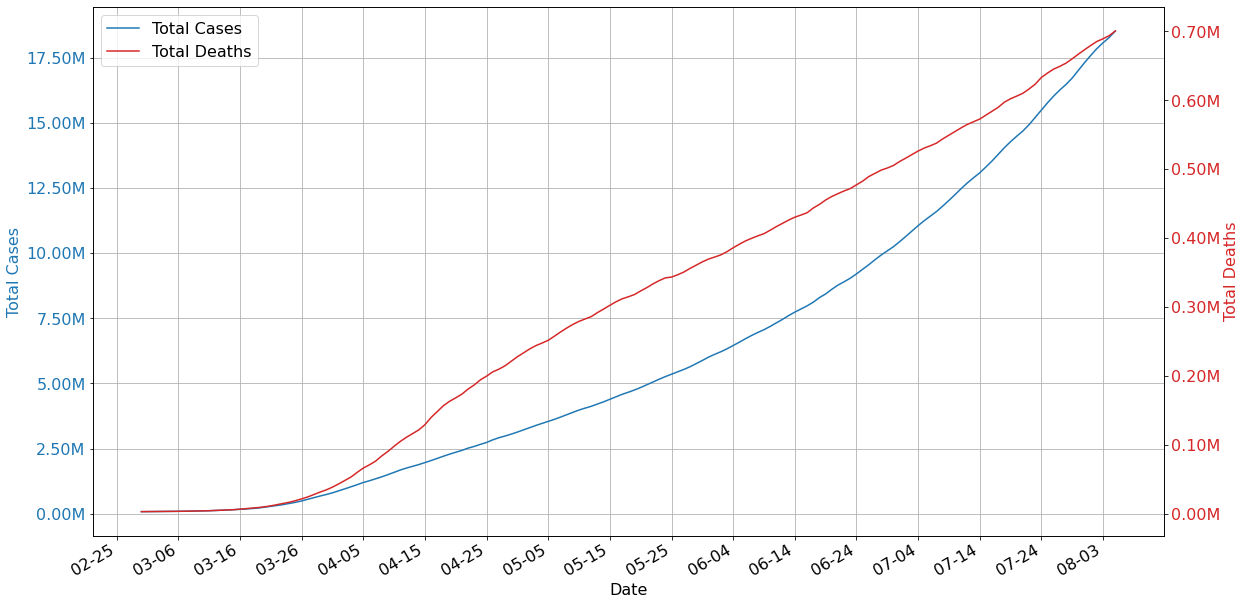

In [14]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

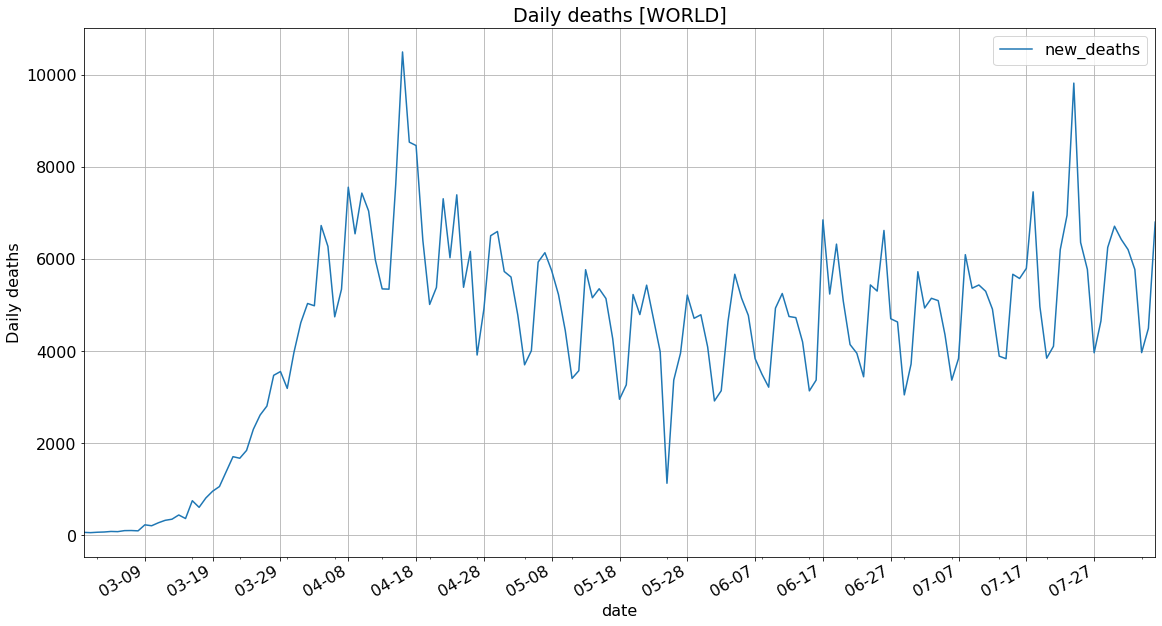

In [15]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [16]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='Daily Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%m-%d',
                       title='Daily Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### Daily cases [WORLD]

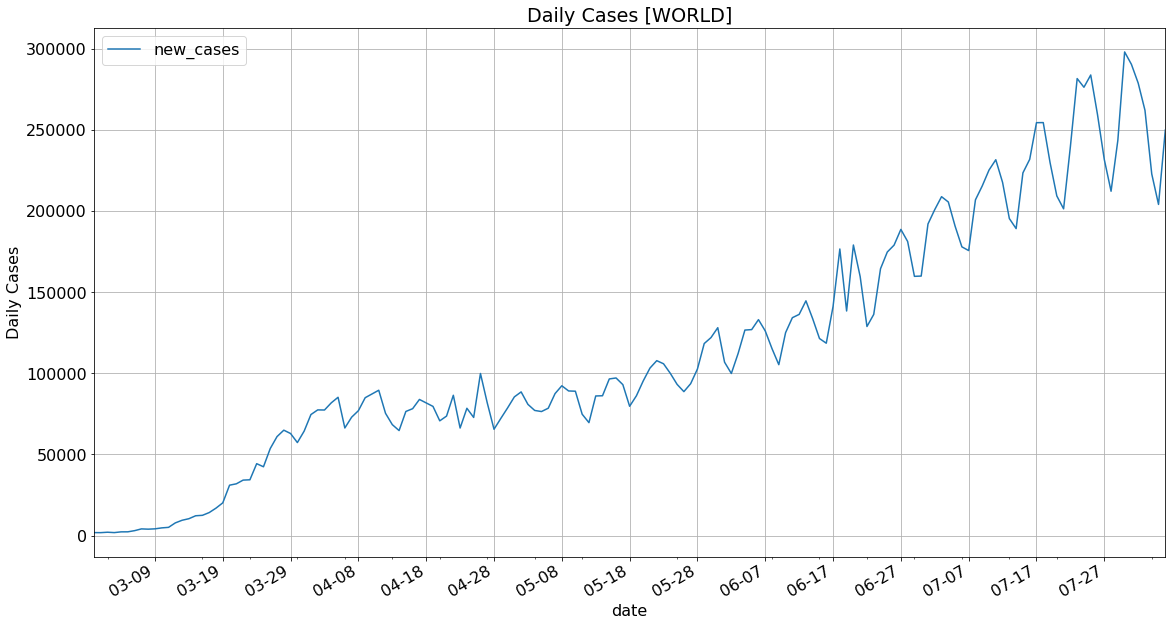

In [17]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [18]:
mainCountries = df[
        (df['total_cases'] >= numberCases) & 
        (df['total_deaths'] >= numberDeaths) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries = mainCountries.dropna()
mainCountries

date        location  total_cases  total_deaths  new_cases  \
33164 2020-08-05   United_States 4771087.0000   156806.0000 57525.0000   
33163 2020-08-04   United_States 4713562.0000   155403.0000 45607.0000   
33162 2020-08-03   United_States 4667955.0000   154860.0000 47511.0000   
33161 2020-08-02   United_States 4620444.0000   154447.0000 58407.0000   
33160 2020-08-01   United_States 4562037.0000   153314.0000 67023.0000   
...          ...             ...          ...           ...        ...   
32872 2020-05-24  United_Kingdom  243081.0000    36734.0000  2062.0000   
32871 2020-05-23  United_Kingdom  241019.0000    36451.0000  2574.0000   
32870 2020-05-22  United_Kingdom  238445.0000    36093.0000  2718.0000   
32869 2020-05-21  United_Kingdom  235727.0000    35755.0000  3052.0000   
32868 2020-05-20  United_Kingdom  232675.0000    35386.0000  2589.0000   

       new_deaths  
33164   1403.0000  
33163    543.0000  
33162    413.0000  
33161   1133.0000  
33160   1244.0000  
...           ...  
32872    283.0000  
32871    358.0000  
32870    338.0000  
32869    369.0000  
32868    548.0000  

[299 rows x 6 columns]

In [19]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'India', 'Mexico', 'United_Kingdom',
       'Italy'], dtype=object)

In [20]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [21]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [22]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', timestamps)
dfTotalDeaths.insert(0, 'date', timestamps)
dfNewCases.insert(0, 'date', timestamps)
dfNewDeaths.insert(0, 'date', timestamps)

## <ins>Total cases</ins> in the most affected countries

In [23]:
dfTotalCases.sort_values(by=['date'], ascending=True)

date  United_States       Brazil        India  Mexico  \
0   2020-02-29        66.0000       1.0000       3.0000  2.0000   
1   2020-03-01        69.0000       2.0000       3.0000  4.0000   
2   2020-03-02        89.0000       2.0000       3.0000  5.0000   
3   2020-03-03       103.0000       2.0000       5.0000  7.0000   
4   2020-03-04       125.0000       2.0000       6.0000 11.0000   
..         ...            ...          ...          ...     ...   
154 2020-08-01   4562037.0000 2662485.0000 1750723.0000     nan   
155 2020-08-02   4620444.0000 2707877.0000 1803695.0000     nan   
156 2020-08-03   4667955.0000 2733677.0000 1855745.0000     nan   
157 2020-08-04   4713562.0000 2750318.0000 1908254.0000     nan   
158 2020-08-05   4771087.0000 2801921.0000          nan     nan   

     United_Kingdom       Italy  
0           30.0000    888.0000  
1           42.0000   1128.0000  
2           47.0000   1689.0000  
3           69.0000   2036.0000  
4          109.0000   2502.0000  
..              ...         ...  
154     303181.0000 247537.0000  
155     303952.0000 247832.0000  
156     304695.0000 248070.0000  
157     305623.0000 248229.0000  
158     306293.0000 248419.0000  

[159 rows x 7 columns]

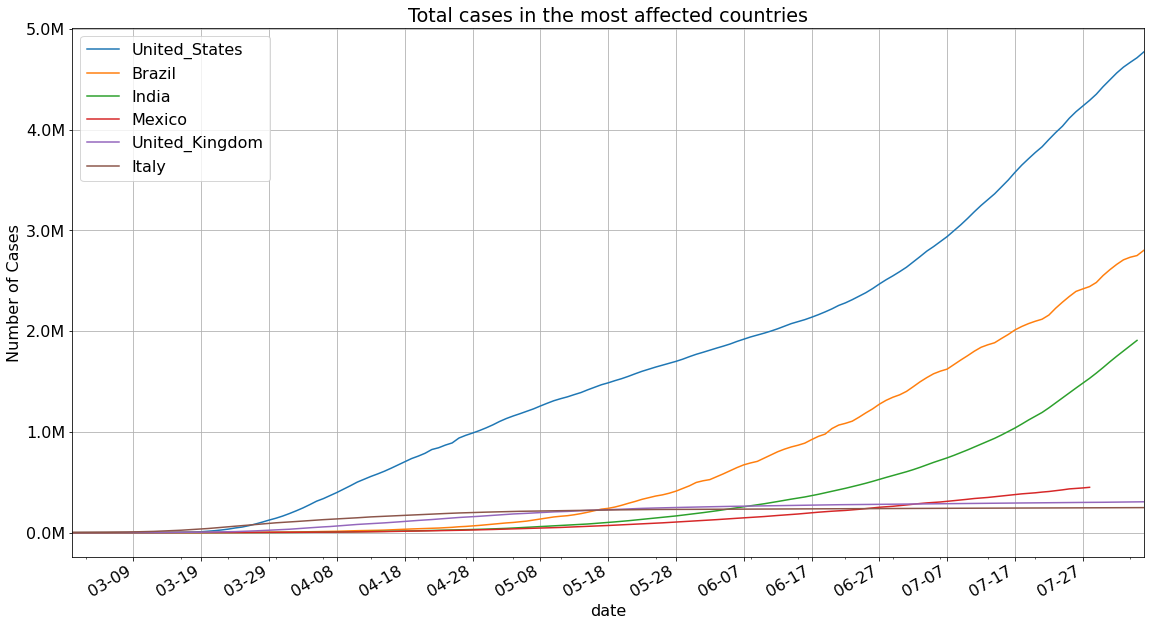

In [24]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

plt.grid()
plt.show()

## Log analysis - log<sub>b</sub><sup>x</sup>

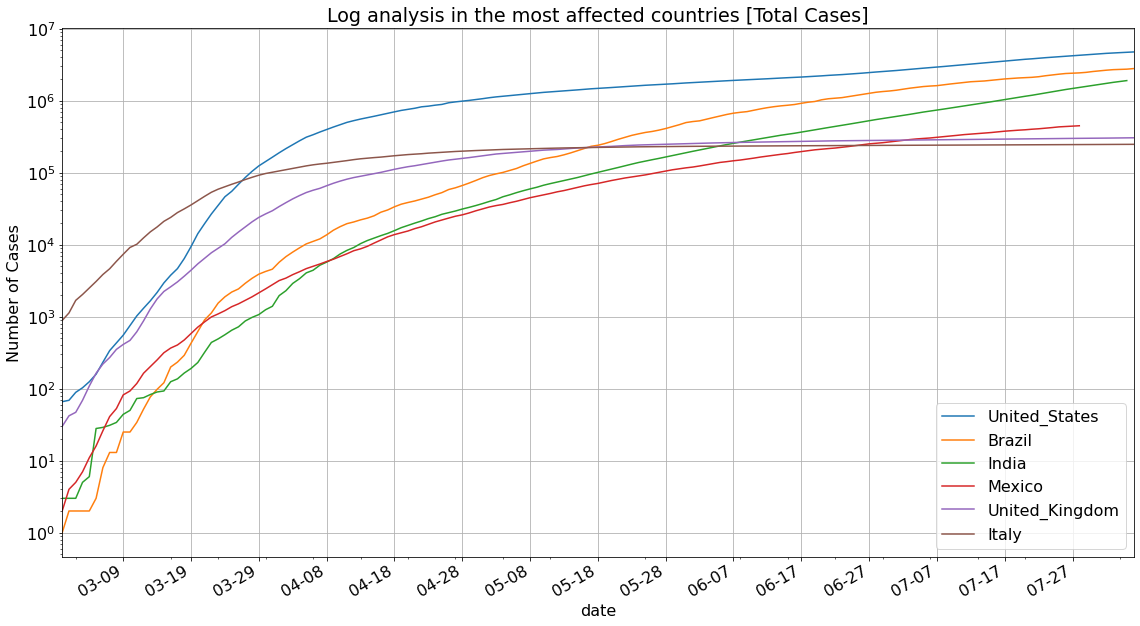

In [25]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log analysis in the most affected countries [Total Cases]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## <ins>Total Deaths</ins> in the most affected countries

In [26]:
dfTotalDeaths.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India  Mexico  United_Kingdom  \
0   2020-02-29         0.0000     0.0000     0.0000  0.0000          0.0000   
1   2020-03-01         1.0000     0.0000     0.0000  0.0000          0.0000   
2   2020-03-02         2.0000     0.0000     0.0000  0.0000          0.0000   
3   2020-03-03         6.0000     0.0000     0.0000  0.0000          0.0000   
4   2020-03-04         9.0000     0.0000     0.0000  0.0000          0.0000   
..         ...            ...        ...        ...     ...             ...   
154 2020-08-01    153314.0000 92475.0000 37364.0000     nan      46119.0000   
155 2020-08-02    154447.0000 93563.0000 38135.0000     nan      46193.0000   
156 2020-08-03    154860.0000 94104.0000 38938.0000     nan      46201.0000   
157 2020-08-04    155403.0000 94665.0000 39795.0000     nan      46210.0000   
158 2020-08-05    156806.0000 95819.0000        nan     nan      46299.0000   

         Italy  
0      21.0000  
1      29.0000  
2      35.0000  
3      52.0000  
4      80.0000  
..         ...  
154 35141.0000  
155 35146.0000  
156 35154.0000  
157 35166.0000  
158 35171.0000  

[159 rows x 7 columns]

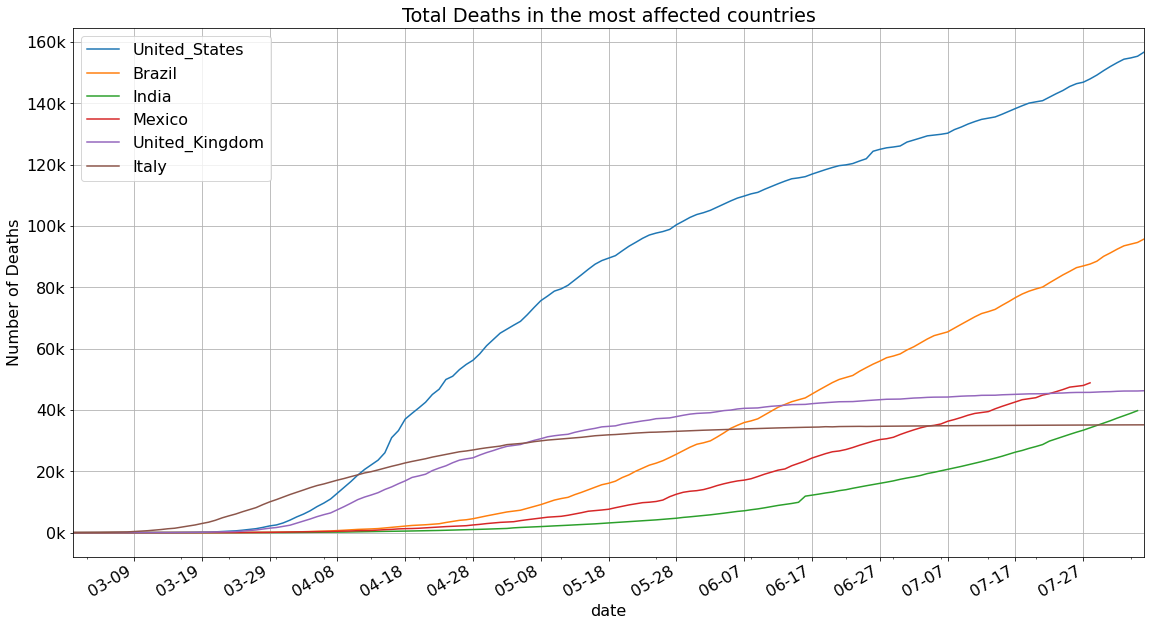

In [27]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

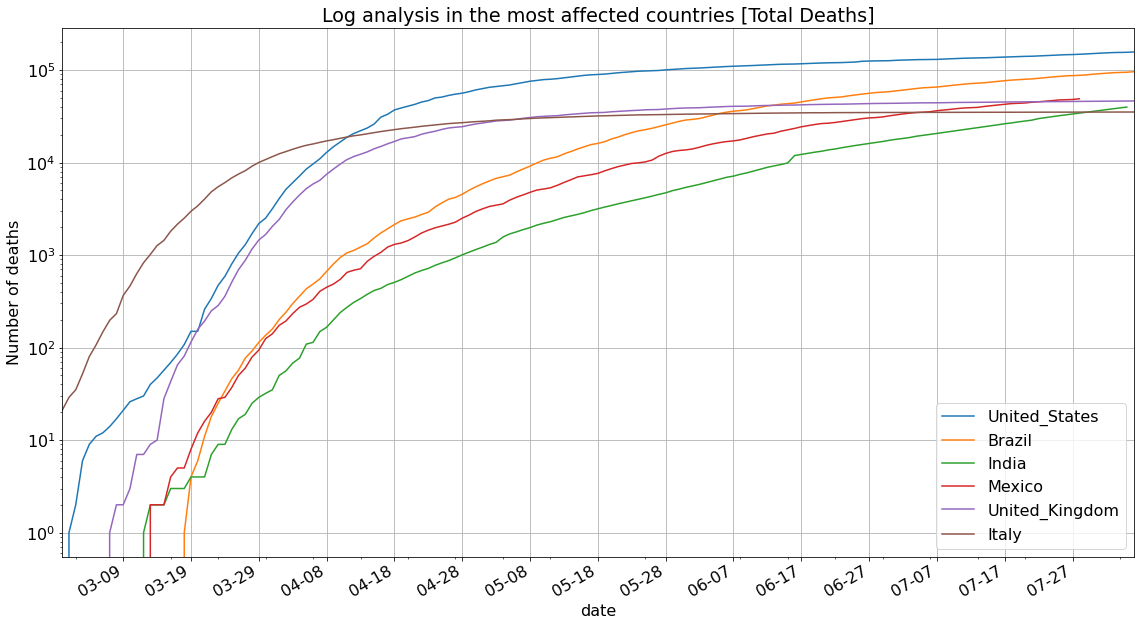

In [28]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log analysis in the most affected countries [Total Deaths]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

In [29]:
dfTotalCases

date  United_States       Brazil        India  Mexico  \
0   2020-02-29        66.0000       1.0000       3.0000  2.0000   
1   2020-03-01        69.0000       2.0000       3.0000  4.0000   
2   2020-03-02        89.0000       2.0000       3.0000  5.0000   
3   2020-03-03       103.0000       2.0000       5.0000  7.0000   
4   2020-03-04       125.0000       2.0000       6.0000 11.0000   
..         ...            ...          ...          ...     ...   
154 2020-08-01   4562037.0000 2662485.0000 1750723.0000     nan   
155 2020-08-02   4620444.0000 2707877.0000 1803695.0000     nan   
156 2020-08-03   4667955.0000 2733677.0000 1855745.0000     nan   
157 2020-08-04   4713562.0000 2750318.0000 1908254.0000     nan   
158 2020-08-05   4771087.0000 2801921.0000          nan     nan   

     United_Kingdom       Italy  
0           30.0000    888.0000  
1           42.0000   1128.0000  
2           47.0000   1689.0000  
3           69.0000   2036.0000  
4          109.0000   2502.0000  
..              ...         ...  
154     303181.0000 247537.0000  
155     303952.0000 247832.0000  
156     304695.0000 248070.0000  
157     305623.0000 248229.0000  
158     306293.0000 248419.0000  

[159 rows x 7 columns]

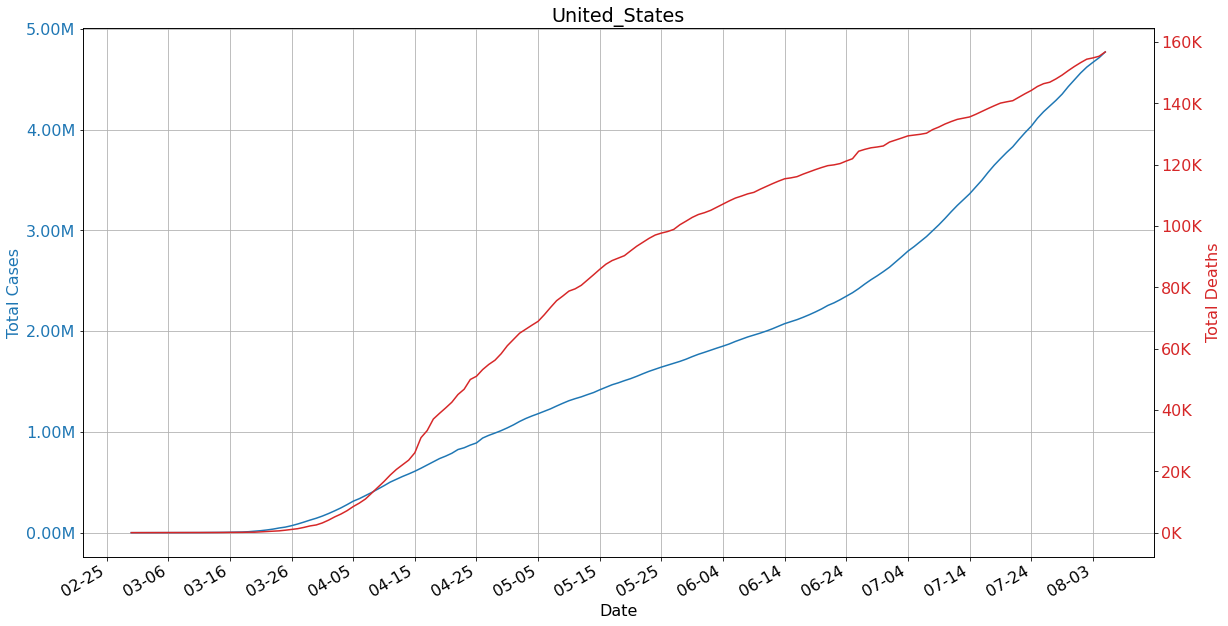

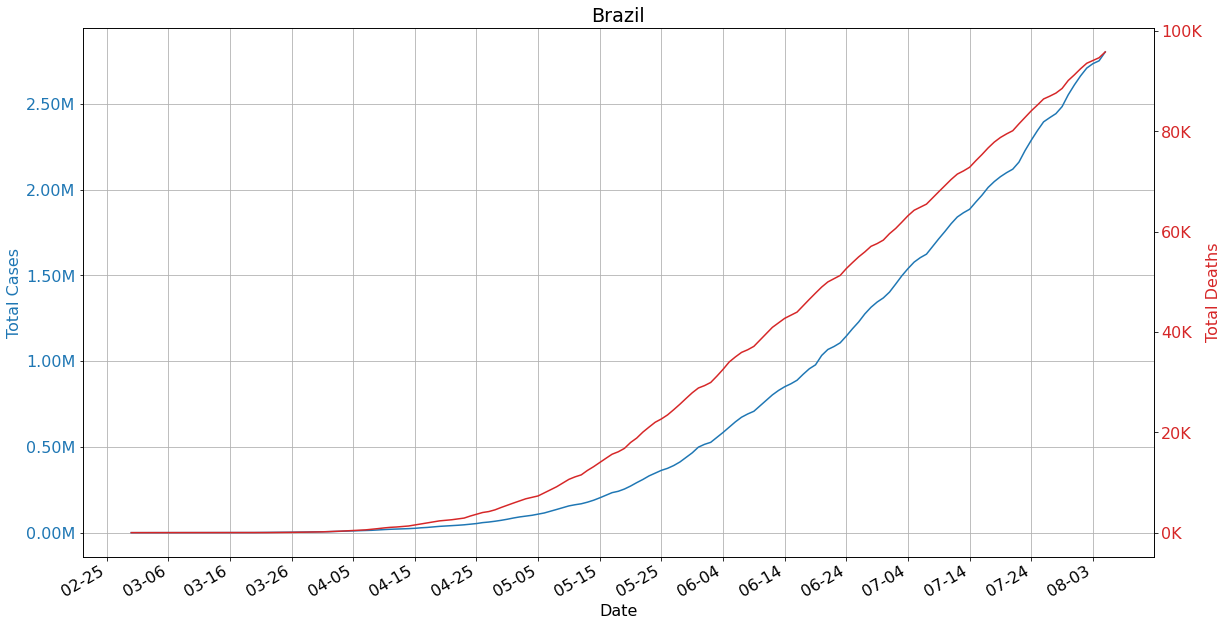

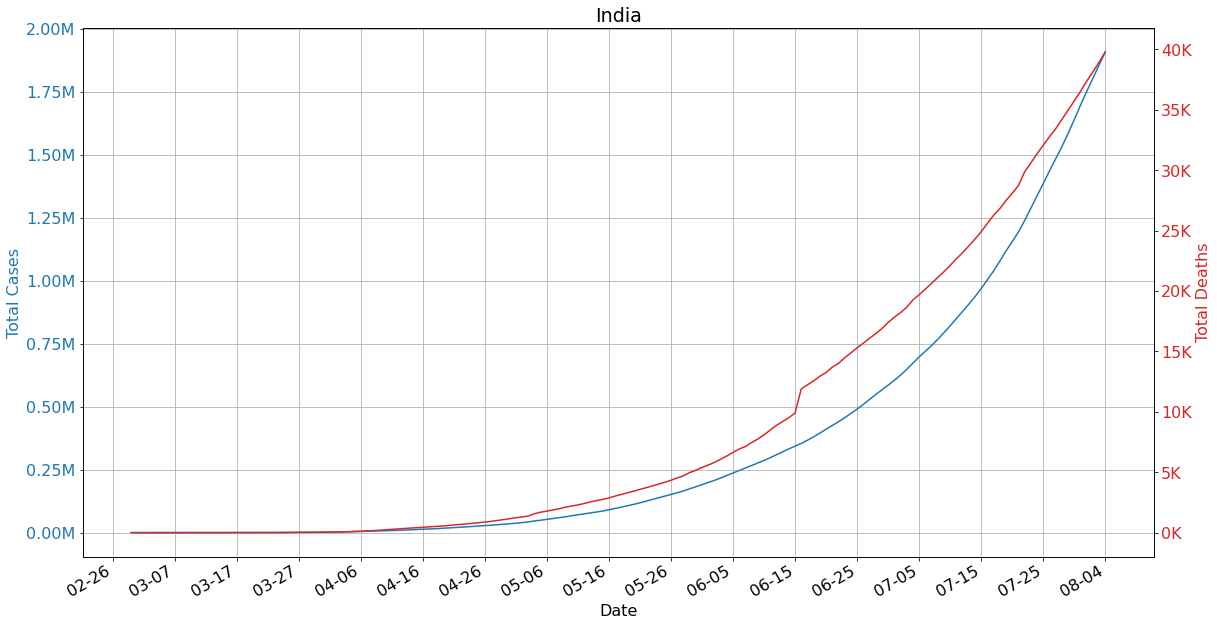

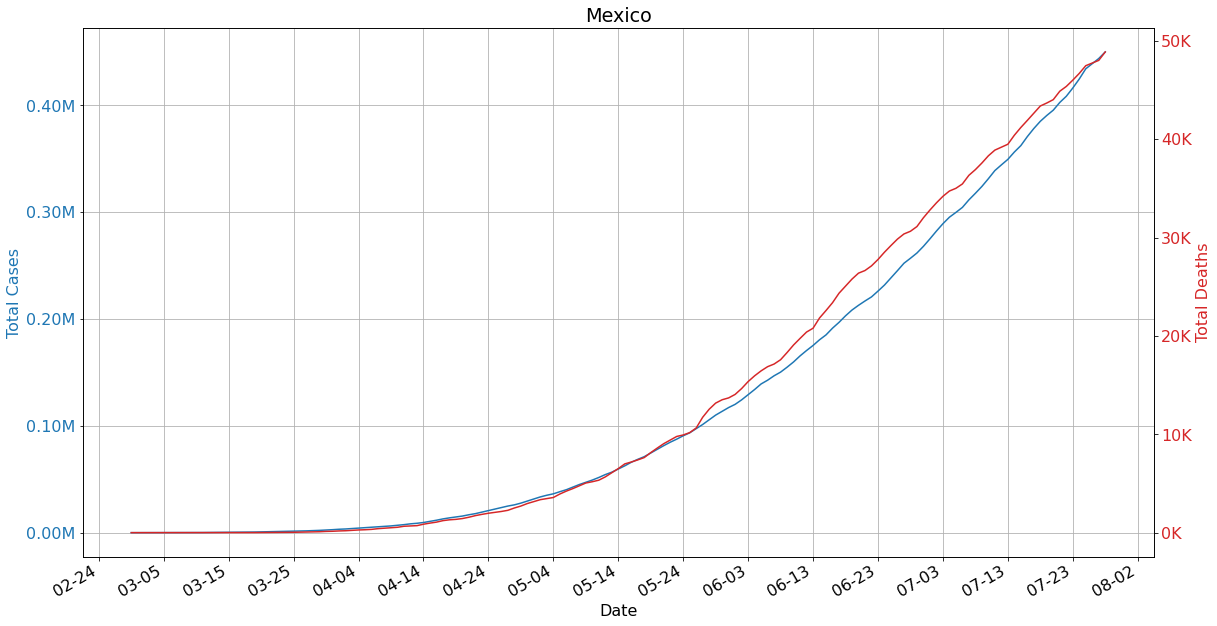

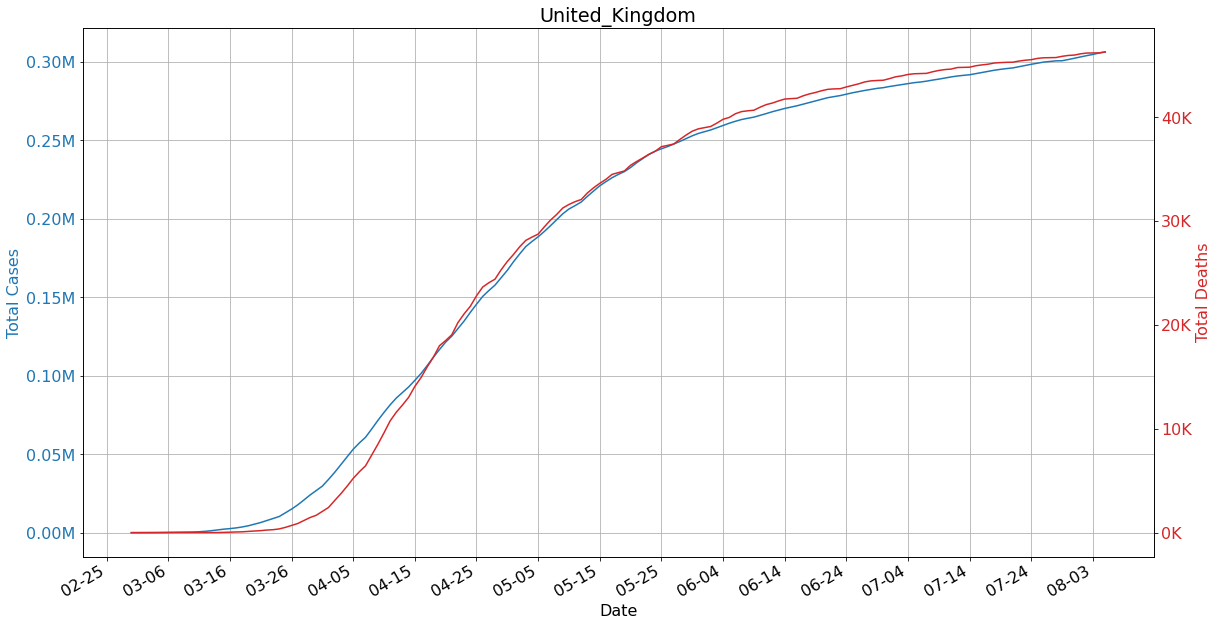

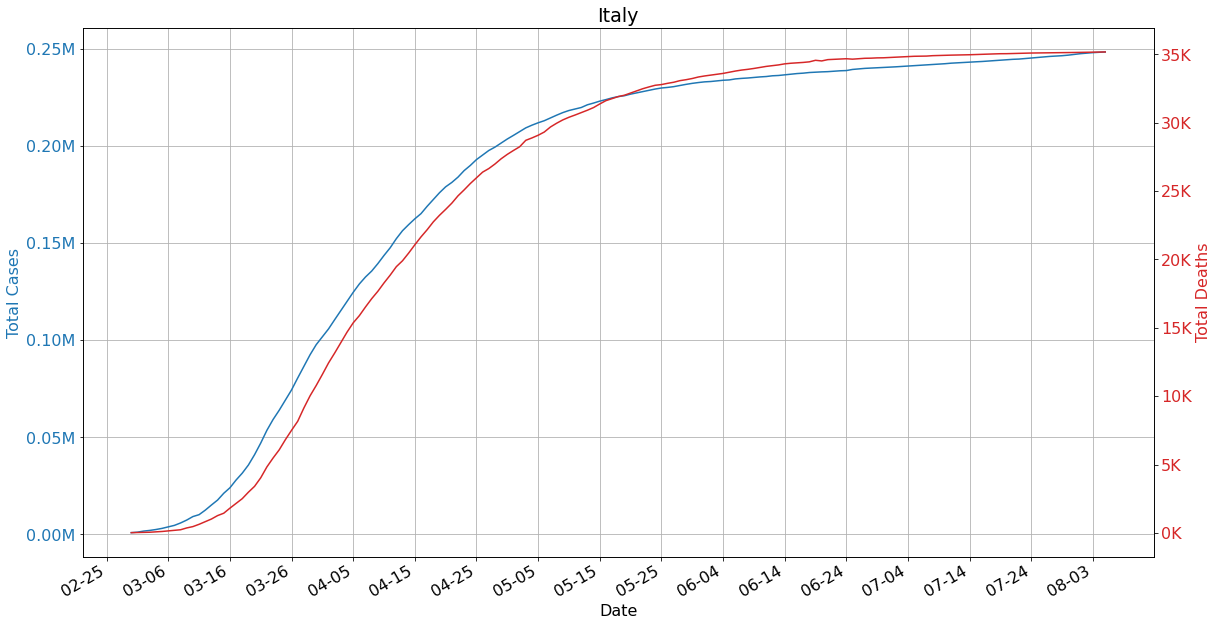

In [30]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfTotalCases.date, dfTotalCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfTotalDeaths.date, dfTotalDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()


## <ins>Daily Cases</ins> in the most affected countries

In [31]:
dfNewCases.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India  Mexico  United_Kingdom  \
0   2020-02-29         6.0000     0.0000     0.0000  2.0000          8.0000   
1   2020-03-01         3.0000     1.0000     0.0000  2.0000         12.0000   
2   2020-03-02        20.0000     0.0000     0.0000  1.0000          5.0000   
3   2020-03-03        14.0000     0.0000     2.0000  2.0000         22.0000   
4   2020-03-04        22.0000     0.0000     1.0000  4.0000         40.0000   
..         ...            ...        ...        ...     ...             ...   
154 2020-08-01     67023.0000 52383.0000 54735.0000     nan        880.0000   
155 2020-08-02     58407.0000 45392.0000 52972.0000     nan        771.0000   
156 2020-08-03     47511.0000 25800.0000 52050.0000     nan        743.0000   
157 2020-08-04     45607.0000 16641.0000 52509.0000     nan        928.0000   
158 2020-08-05     57525.0000 51603.0000        nan     nan        670.0000   

       Italy  
0   238.0000  
1   240.0000  
2   561.0000  
3   347.0000  
4   466.0000  
..       ...  
154 379.0000  
155 295.0000  
156 238.0000  
157 159.0000  
158 190.0000  

[159 rows x 7 columns]

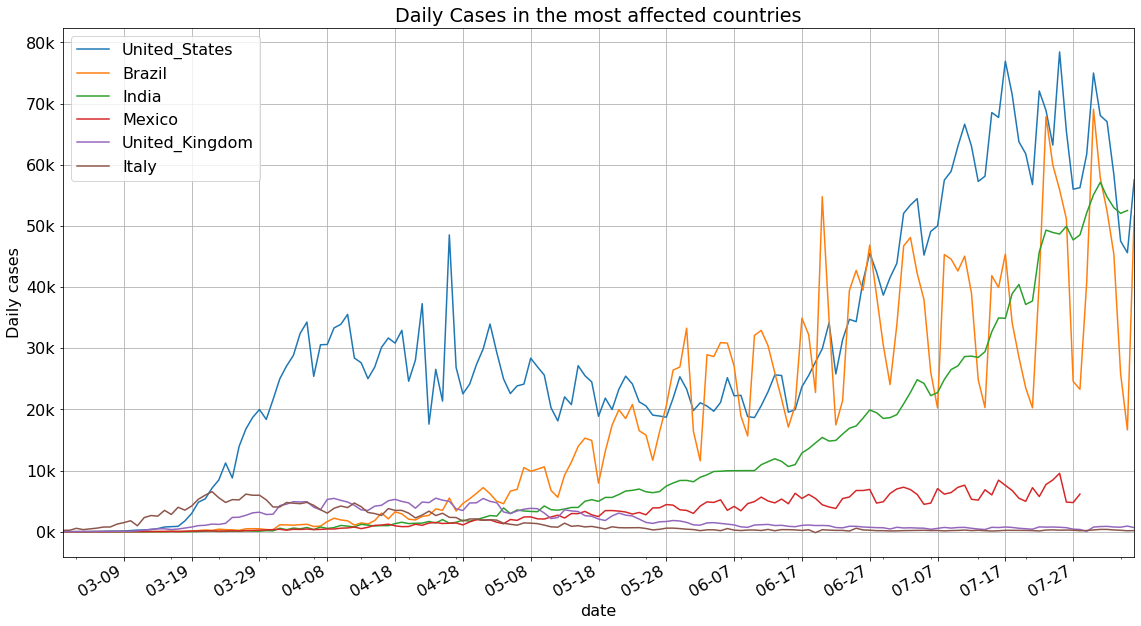

In [32]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily cases')
plt.title('Daily Cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [33]:
toGo = dfNewCases.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

In [34]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='Daily cases in the most affected countries')

figTest.show()

## <ins>Daily Deaths</ins> in the most affected countries

In [35]:
dfNewDeaths.sort_values(by=['date'], ascending=True)

date  United_States    Brazil    India  Mexico  United_Kingdom  \
0   2020-02-29         0.0000    0.0000   0.0000  0.0000          0.0000   
1   2020-03-01         1.0000    0.0000   0.0000  0.0000          0.0000   
2   2020-03-02         1.0000    0.0000   0.0000  0.0000          0.0000   
3   2020-03-03         4.0000    0.0000   0.0000  0.0000          0.0000   
4   2020-03-04         3.0000    0.0000   0.0000  0.0000          0.0000   
..         ...            ...       ...      ...     ...             ...   
154 2020-08-01      1244.0000 1212.0000 853.0000     nan        120.0000   
155 2020-08-02      1133.0000 1088.0000 771.0000     nan         74.0000   
156 2020-08-03       413.0000  541.0000 803.0000     nan          8.0000   
157 2020-08-04       543.0000  561.0000 857.0000     nan          9.0000   
158 2020-08-05      1403.0000 1154.0000      nan     nan         89.0000   

      Italy  
0    4.0000  
1    8.0000  
2    6.0000  
3   17.0000  
4   28.0000  
..      ...  
154  9.0000  
155  5.0000  
156  8.0000  
157 12.0000  
158  5.0000  

[159 rows x 7 columns]

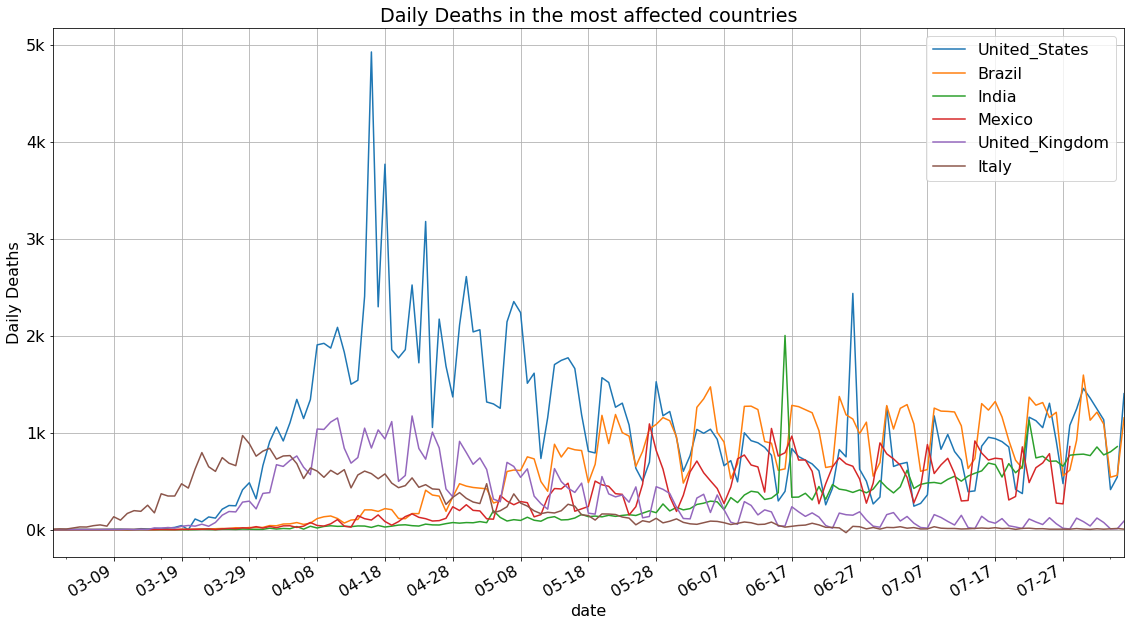

In [36]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily Deaths')
plt.title('Daily Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Daily cases and deaths by country

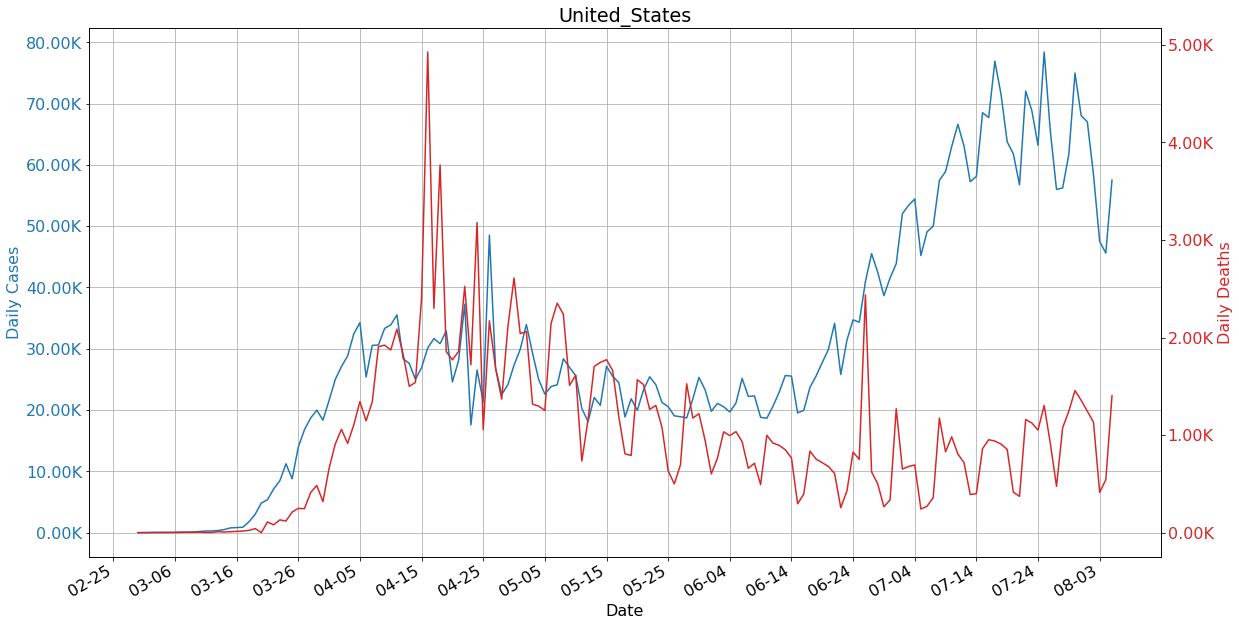

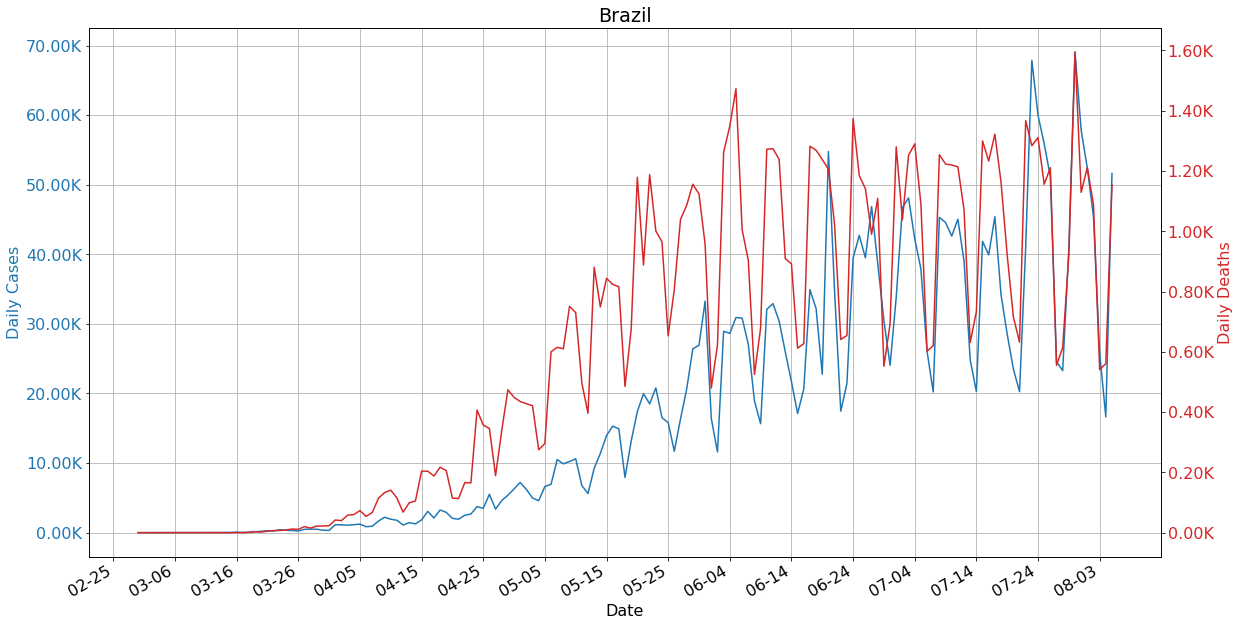

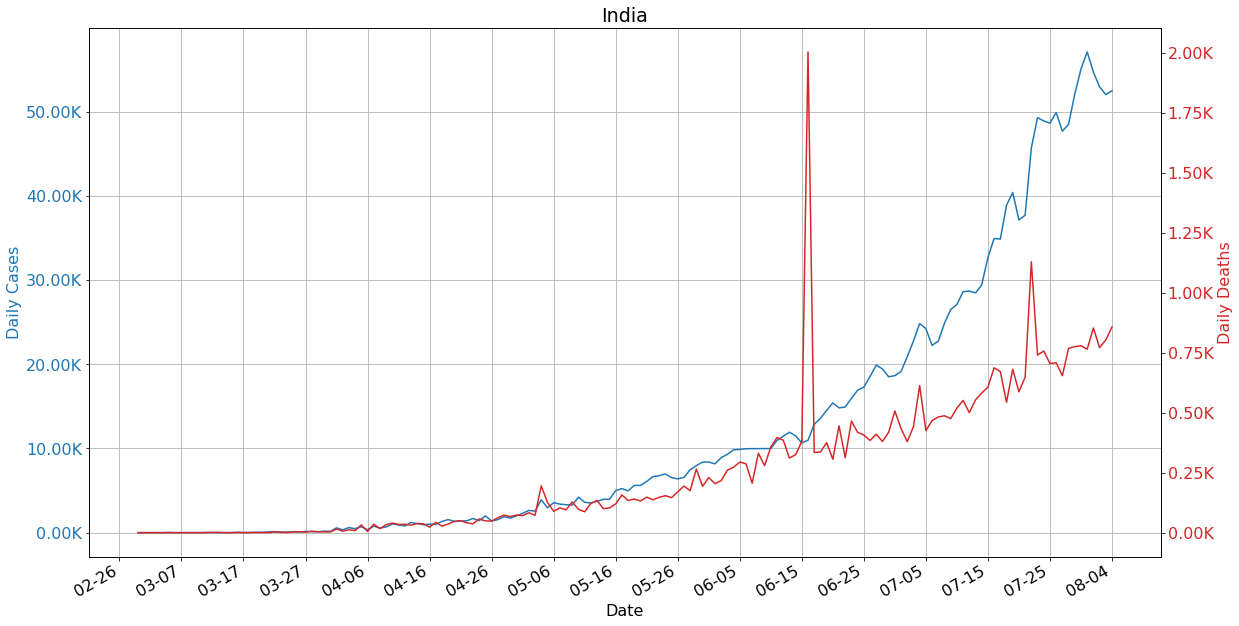

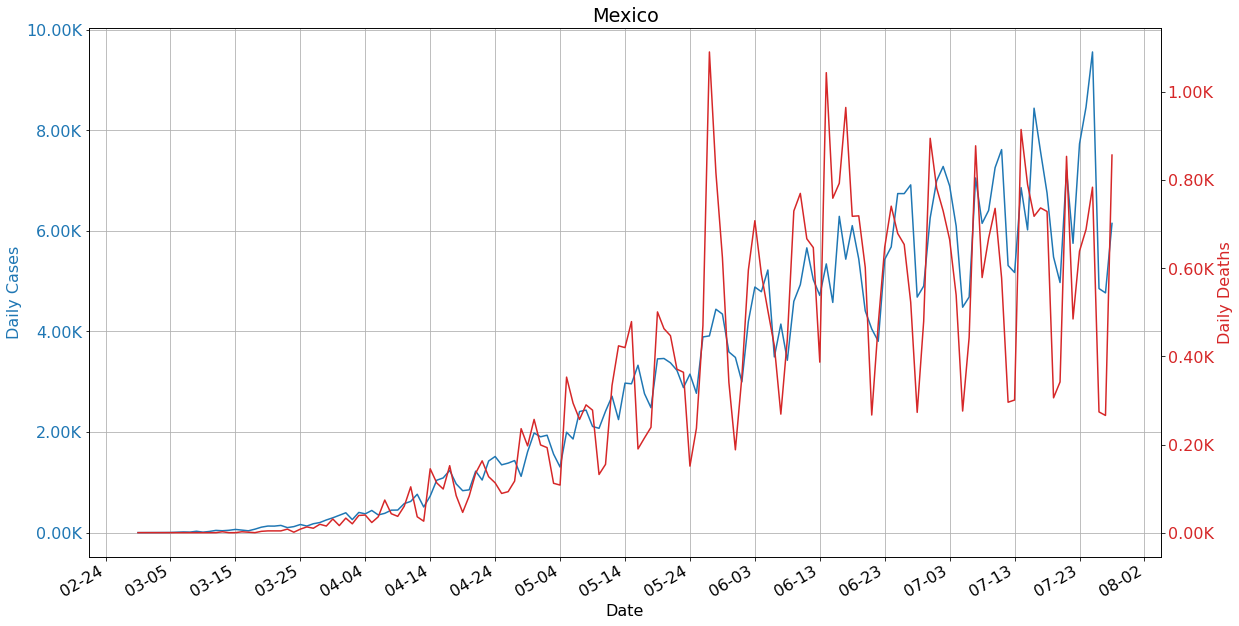

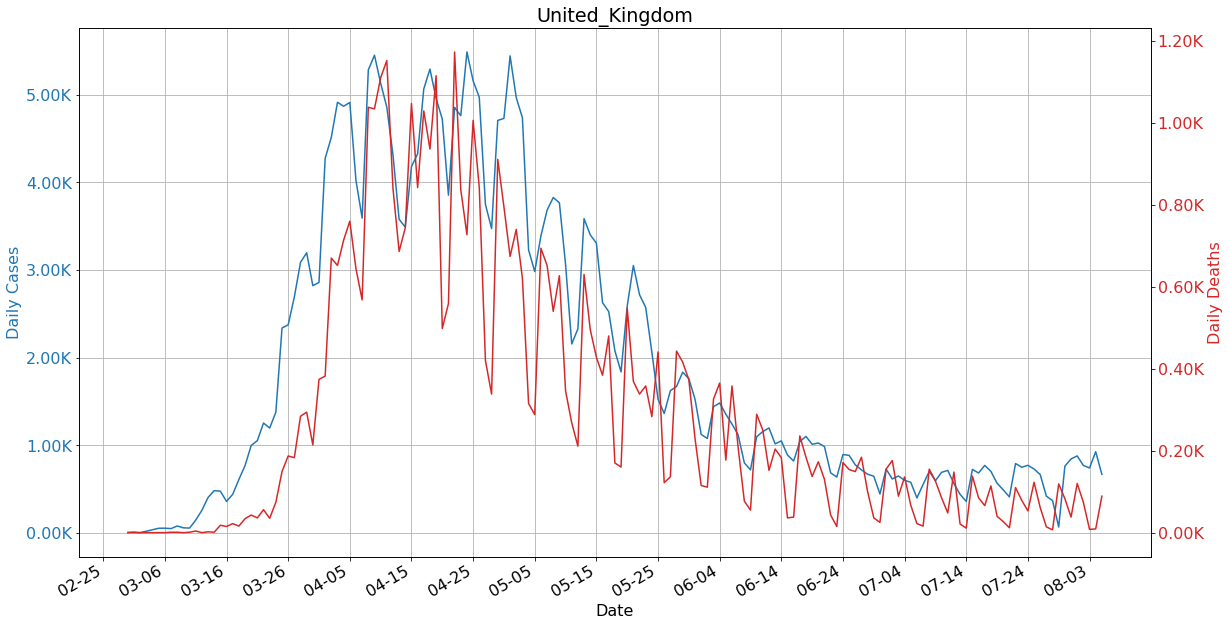

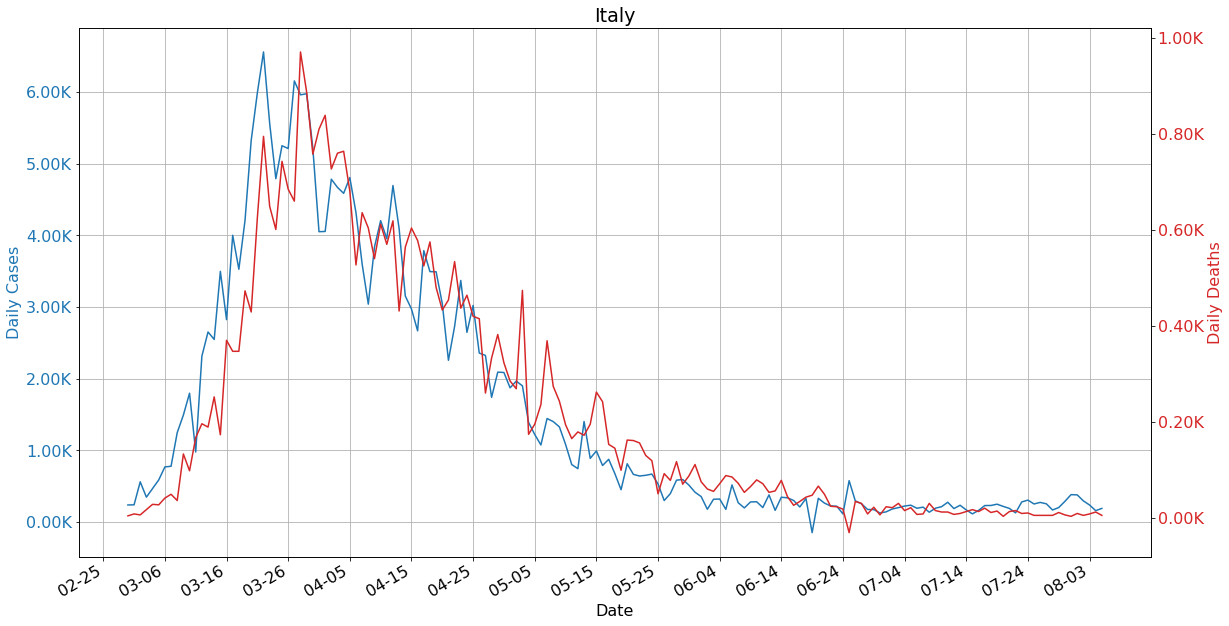

In [37]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfNewCases.date, dfNewCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfNewDeaths.date, dfNewDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()

## <span style="color:green">Brazil Cases</span>

### source: https://data.brasil.io/dataset/covid19/_meta/list.html

In [38]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

city  city_ibge_code       date  epidemiological_week  \
0          São Paulo    3550308.0000 2020-02-25                     9   
2          São Paulo    3550308.0000 2020-02-26                     9   
4          São Paulo    3550308.0000 2020-02-27                     9   
6          São Paulo    3550308.0000 2020-02-28                     9   
8          São Paulo    3550308.0000 2020-02-29                     9   
...              ...             ...        ...                   ...   
487357    Tocantínia    1721109.0000 2020-08-05                    32   
487358      Tupirama    1721257.0000 2020-08-05                    32   
487359    Tupiratins    1721307.0000 2020-08-05                    32   
487360  Wanderlândia    1722081.0000 2020-08-05                    32   
487361       Xambioá    1722107.0000 2020-08-05                    32   

        estimated_population_2019  is_last  is_repeated  \
0                   12252023.0000    False        False   
2                   12252023.0000    False        False   
4                   12252023.0000    False        False   
6                   12252023.0000    False        False   
8                   12252023.0000    False        False   
...                           ...      ...          ...   
487357                  7545.0000    False         True   
487358                  1891.0000    False         True   
487359                  2671.0000    False         True   
487360                 11683.0000    False         True   
487361                 11540.0000    False         True   

        last_available_confirmed  \
0                              1   
2                              1   
4                              1   
6                              2   
8                              2   
...                          ...   
487357                       222   
487358                        23   
487359                         6   
487360                       158   
487361                       565   

        last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.0082          2020-02-25   
2                                              0.0082          2020-02-26   
4                                              0.0082          2020-02-27   
6                                              0.0163          2020-02-28   
8                                              0.0163          2020-02-29   
...                                               ...                 ...   
487357                                      2942.3459          2020-08-03   
487358                                      1216.2877          2020-08-03   
487359                                       224.6350          2020-08-03   
487360                                      1352.3924          2020-08-03   
487361                                      4896.0139          2020-08-03   

        last_available_death_rate  last_available_deaths  order_for_place  \
0                          0.0000                      0                1   
2                          0.0000                      0                2   
4                          0.0000                      0                3   
6                          0.0000                      0                4   
8                          0.0000                      0                5   
...                           ...                    ...              ...   
487357                     0.0180                      4               79   
487358                     0.0435                      1               75   
487359                     0.0000                      0               75   
487360                     0.0316                      5              100   
487361                     0.0142                      8               89   

       place_type state  new_confirmed  new_deaths  
0            city    SP              1           0  
2            city    SP              0   

In [39]:
cities = set(df.loc[:, 'city'].values)

In [40]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [41]:
dfSelect = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
dfToday = dfSelect[dfSelect['date'] > (pd.to_datetime("today") - pd.to_timedelta('2days'))]
dfToday

date state          city  new_confirmed  new_deaths
481856 2020-08-05    AC    Acrelândia              0           0
481857 2020-08-05    AC  Assis Brasil              0           0
481858 2020-08-05    AC     Brasiléia              0           0
481859 2020-08-05    AC        Bujari              0           0
481860 2020-08-05    AC      Capixaba              0           0
...           ...   ...           ...            ...         ...
487357 2020-08-05    TO    Tocantínia              0           0
487358 2020-08-05    TO      Tupirama              0           0
487359 2020-08-05    TO    Tupiratins              0           0
487360 2020-08-05    TO  Wanderlândia              0           0
487361 2020-08-05    TO       Xambioá              0           0

[5468 rows x 5 columns]

In [42]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [43]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

state  new_confirmed  new_deaths
0  Other_States        1258813       34499
1            SP         585203       24108
2            CE         178212        7819
3            BA         175129        3713
4            RJ         168920       13716
5            PA         160700        5817
6            MG         133320        2864
7            MA         123897        3085

## Cases in Brazil cities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f603f9e74e0>,
      dtype=object)

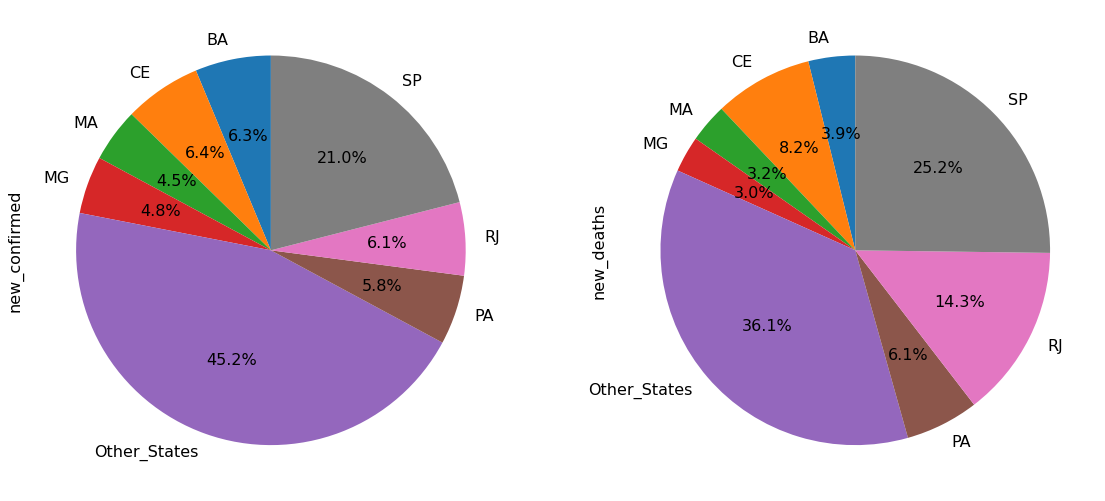

In [44]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [45]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

date state                   city  new_confirmed  new_deaths
487150 2020-08-05    SP              São Paulo           2823         104
486679 2020-08-05    SP               Campinas            361           8
487140 2020-08-05    SP  São José do Rio Preto            314           4
487057 2020-08-05    SP         Ribeirão Preto            288          14
487126 2020-08-05    SP               Sorocaba            188           3
486638 2020-08-05    SP                  Bauru            168           4
486877 2020-08-05    SP                Limeira            158          11
487132 2020-08-05    SP  São Bernardo do Campo            152          15
486690 2020-08-05    SP            Carapicuíba            138           2
486634 2020-08-05    SP                Barueri            121          -1
487141 2020-08-05    SP    São José dos Campos            118           6
486960 2020-08-05    SP                 Osasco            117           5
486809 2020-08-05    SP             Indaiatuba            113          14
487106 2020-08-05    SP            Santo André            111          10
487113 2020-08-05    SP                 Santos            111           6

In [46]:
today = (pd.to_datetime("today") - pd.to_timedelta('2days')).date()
today

datetime.date(2020, 8, 4)

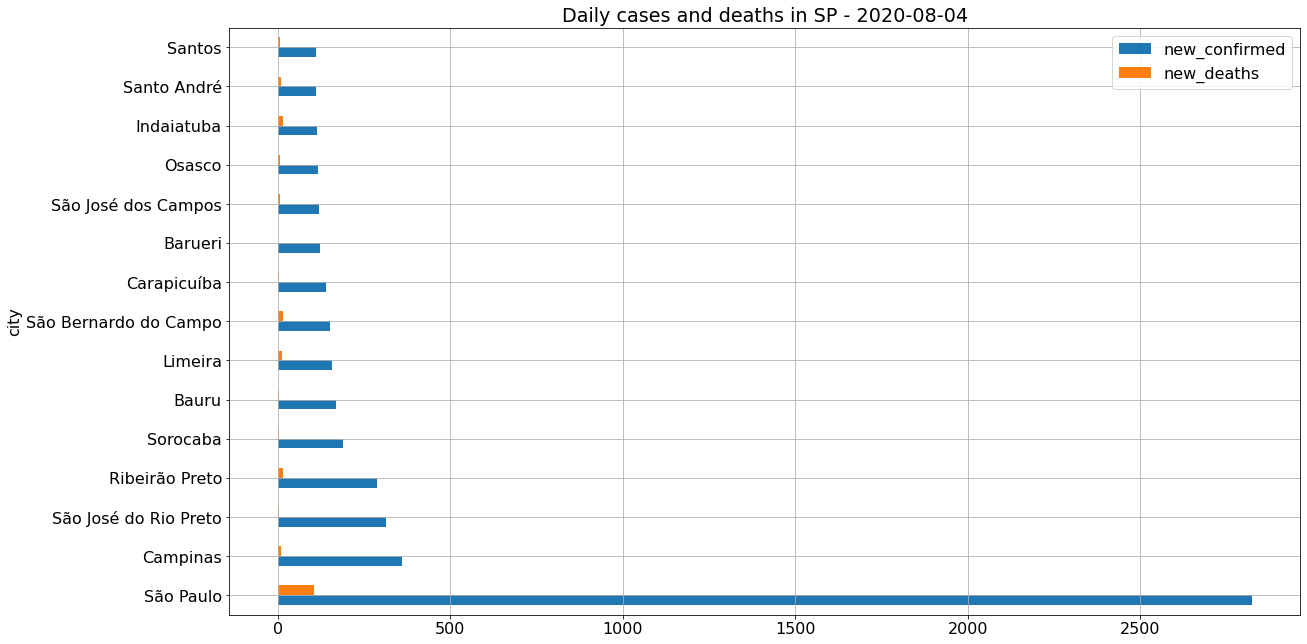

In [47]:
dfSP.plot.barh(x='city', y=['new_confirmed','new_deaths'], figsize=(19.20,10.80))
plt.title('Daily cases and deaths in SP - '+str(today))
plt.grid()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [48]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0     2020-3-9    228.0000
1    2020-3-10    208.0000
2    2020-3-11    273.0000
3    2020-3-12    326.0000
4    2020-3-13    350.0000
..         ...         ...
145   2020-8-1   6209.0000
146   2020-8-2   5777.0000
147   2020-8-3   3970.0000
148   2020-8-4   4498.0000
149   2020-8-5   6806.0000

[150 rows x 2 columns]

In [49]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [50]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [51]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

112 38


In [52]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [53]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [54]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [55]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [56]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 1s 129ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.2071 - val_mse: 0.2071
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1475 - val_mse: 0.1475
Epoch 3/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0860 - mse: 0.0860 - val_loss: 0.0972 - val_mse: 0.0972
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 5/50
11/11 [==============================] - 0s 22ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 7/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 8/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0200 - 

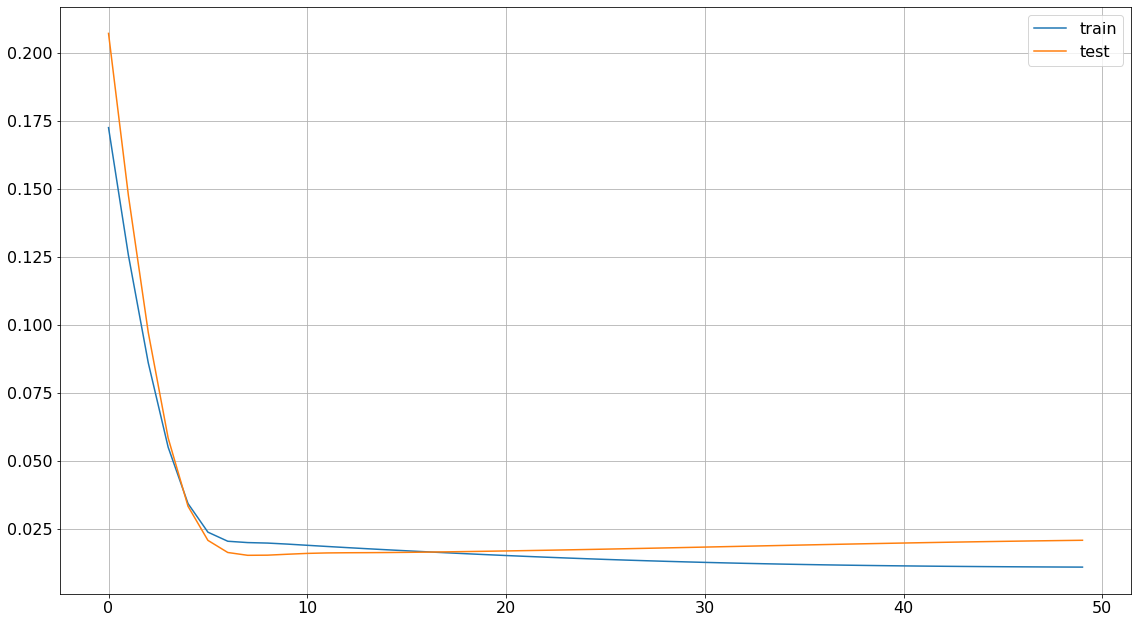

In [57]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [59]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [60]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1082.41 RMSE
Test Score: 1219.23 RMSE


In [61]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [62]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

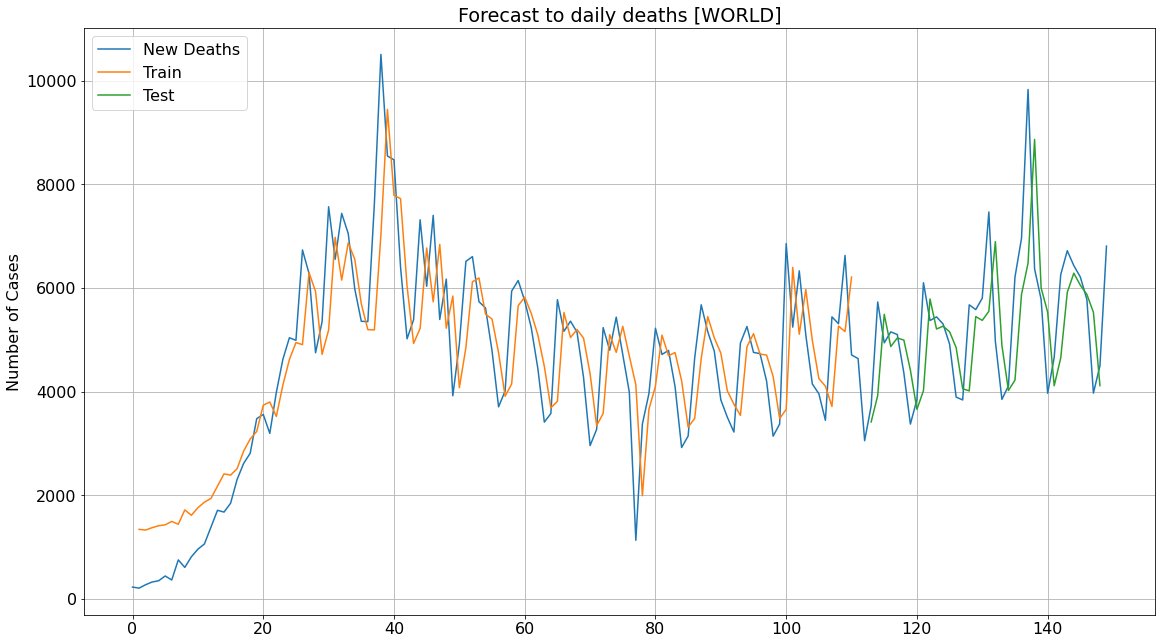

In [63]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

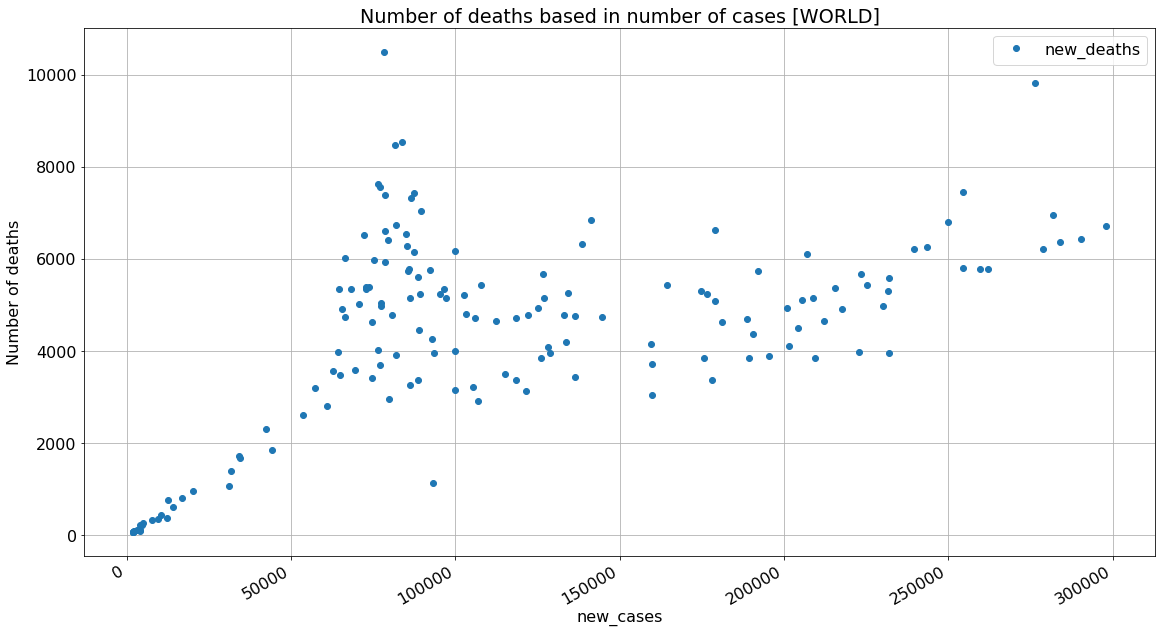

In [64]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

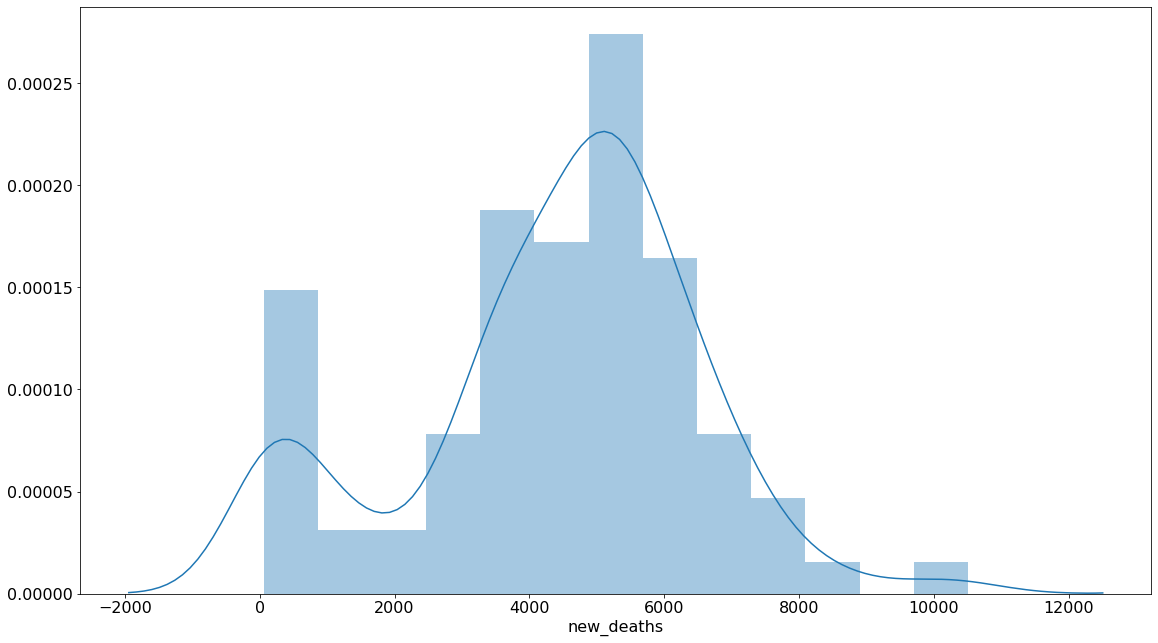

In [65]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [66]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
print(regressor.intercept_)

[32373.69300365]


In [70]:
print(regressor.coef_)

[[18.65365327]]


In [71]:
y_pred = regressor.predict(X_test)

In [72]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0    4137.0000  34313.6729
1   84987.0000 154592.4292
2  112258.0000 119057.2197
3   64738.0000 132152.0843
4  176646.0000 130174.7971
..         ...         ...
59 225287.0000 133849.5668
60 290464.0000 152316.6835
61 276330.0000 215683.1437
62  76463.0000 107193.4963
63 106880.0000  86842.3605

[64 rows x 2 columns]

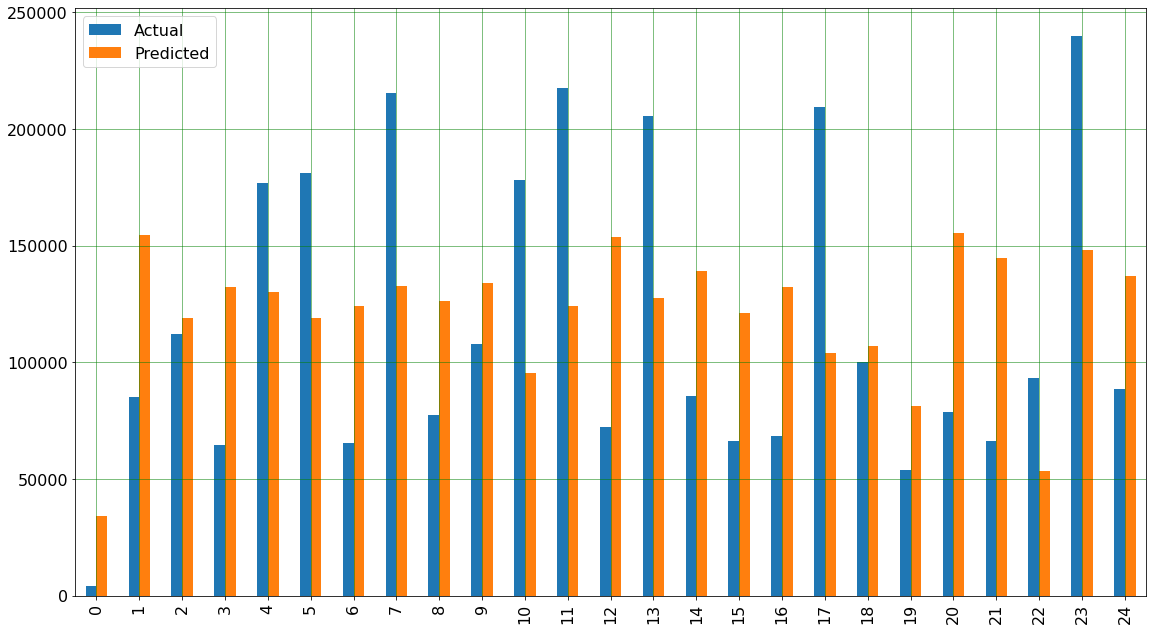

In [73]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

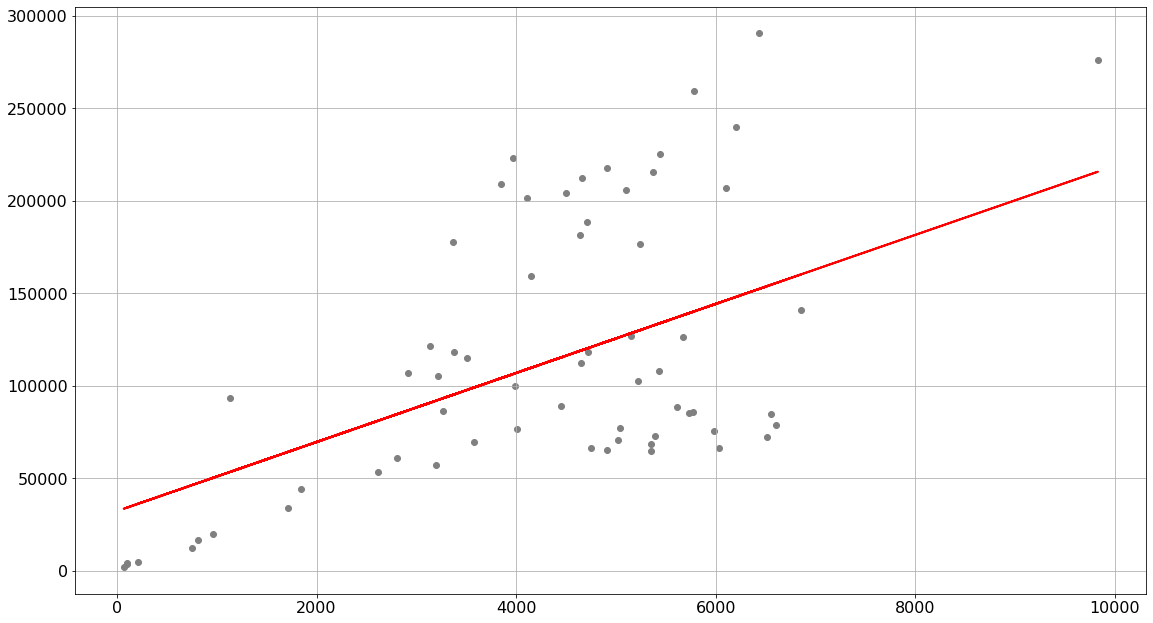

In [74]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 50881.09912305194
Mean Squared Error: 3570734205.8818264
Root Mean Squared Error: 3570734205.8818264


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [76]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

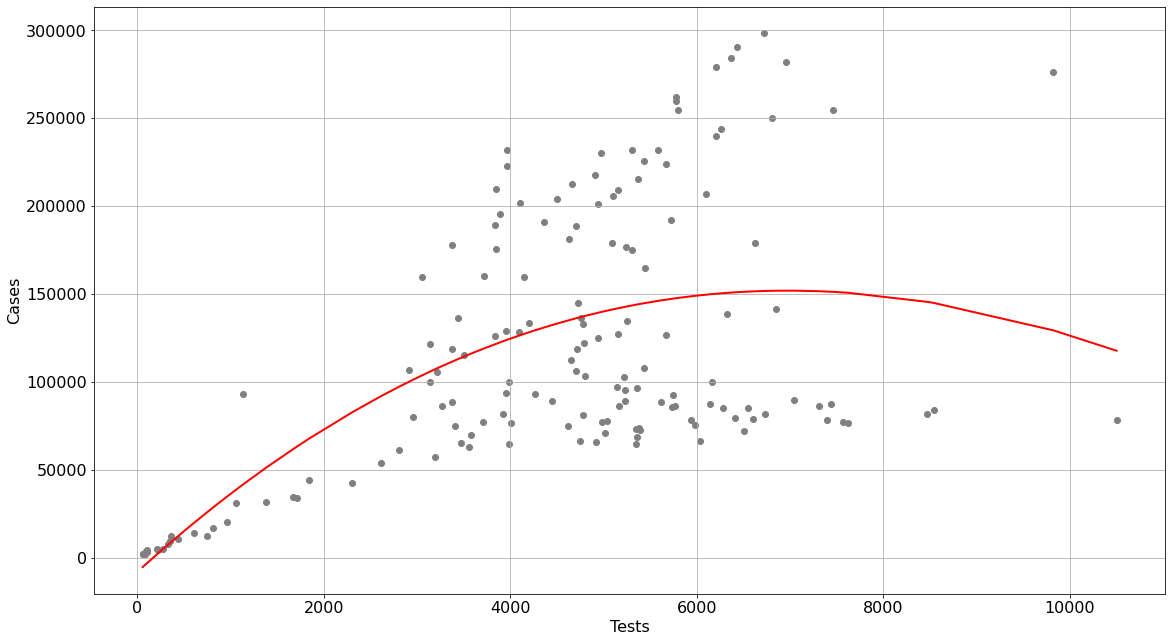

In [77]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()